In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

import neuro_morpho_toolbox as nmt
# ns=nmt.neuron_set('/Users/pengxie/Documents/Research/fullMorph_classification/data/registered_swc/Janelia_test/swc/Whole/')
ns=nmt.neuron_set('/home/penglab/Documents/Janelia_1000')



/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.88
Loading CCF brain structure data...
Loading time: 0.00
Loading...
100 loaded: 2.9s
Invalid number of soma found: 0
QC failed: AA0114.swc
Invalid number of soma found: 0
QC failed: AA0115.swc
200 loaded: 2.1s
300 loaded: 2.9s
400 loaded: 2.7s
Invalid number of soma found: 0
QC failed: AA0472.swc
500 loaded: 2.5s
Invalid number of soma found: 0
QC failed: AA0576.swc
Invalid number of soma found: 0
QC failed: AA0585.swc
Invalid number of soma found: 0
QC failed: AA0589.swc
600 loaded: 2.3s
Invalid number of soma found: 0
QC failed: AA0639.swc
Invalid number of soma found: 0
QC failed: AA0670.swc
Invalid number of soma found: 0
QC failed: AA0672.swc
700 loaded: 2.3s
Invalid number of soma found: 0
QC failed: AA0754.swc
Invalid number of soma found: 0
QC failed: AA0763.swc
800 loaded: 2.9s
900 loaded: 2.1s
QC failed: AA0952.swc
QC failed: AA0964.swc
QC failed: AA0968.swc
QC

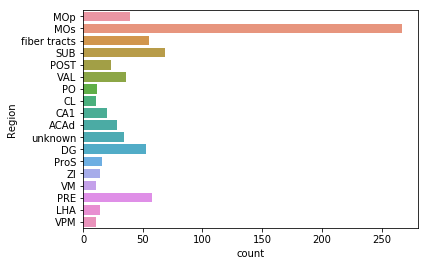

In [2]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

## Perform UMAP operation to soma's location/home/penglab/FeaCal/dataSource

In [3]:
_ = ns.ReduceDimUMAP(feature_set="soma_features", n_neighbors=2)

/home/penglab/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning:

Embedding a total of 284 separate connected components using meta-embedding (experimental)

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/home/penglab/anaconda3/lib/python3.7/site-packages/umap/spectral.py:182: UserWarning:

failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, b

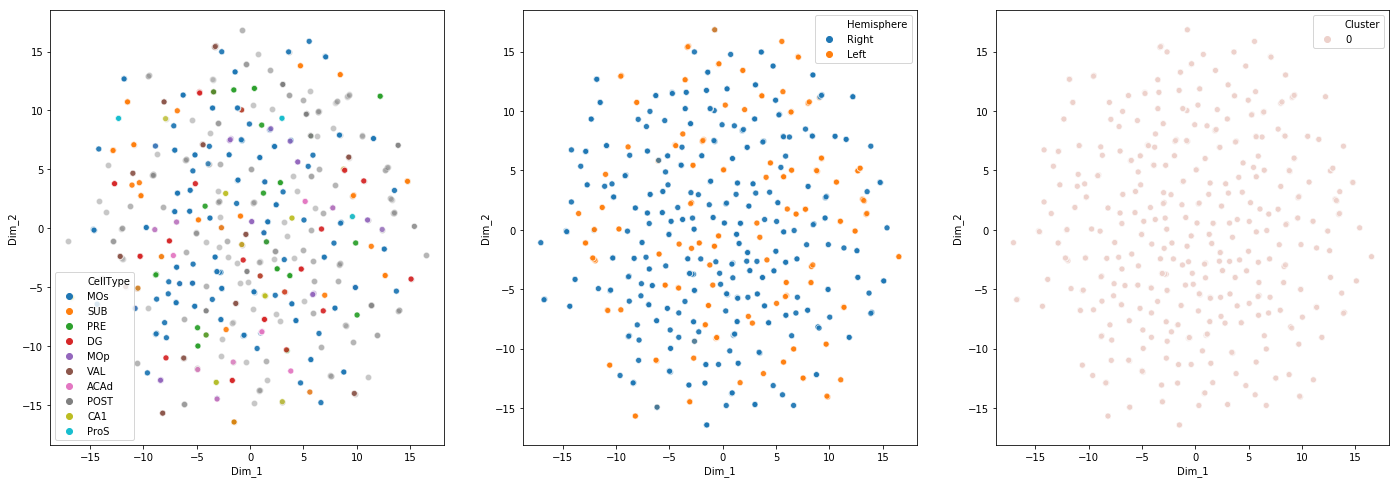

In [4]:
#_ = ns.ReduceDimUMAP(feature_set="soma_features", n_neighbors=2)
_ = ns.FeatureScatter(["CellType", "Hemisphere", "Cluster"], map="UMAP")


Initiallization

In [5]:
colname = ['Homogeneity','Completeness','V-measure','Adjusted Rand Index','Adjusted Mutual Information','Silhouette Coefficient','parameter']

For hierarchy

#%% Store the result of Hierarchy
result_hier = pd.DataFrame(columns = colname)
L_method_list=['single', 'complete','average','weighted','centroid','median','ward']
L_metric_list=['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine',
               'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski', 
               'mahalanobis', 'matching','minkowski','rogerstanimoto', 'russellrao',
               'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']
#linkage using 'yule' and 'jensenshannon' may result in a condensed distance matrix must contain only finite values.

criterionH_list=['inconsistent','distance','maxclust','monocrit','maxclust_monocrit']

hier_dict={'L_method':'single', 'L_metric':'euclidean','criterionH':'inconsistent', 'depth':2,'R':None,'t':0.9,'optimal_ordering':False}
for L_methodidx in L_method_list:
    hier_dict.update(L_method = L_methodidx)
    for L_metricidx in L_metric_list:
        hier_dict.update(L_metric = L_metricidx )
        for criterionidx in criterionH_list:
            hier_dict.update(criterionH = criterionidx )   
            for depth_iter in range(2,15):
                hier_dict.update(depth = depth_iter ) 
                print(hier_dict)
                _ = ns. get_clusters(method='Hierarchy',karg_dict=hier_dict)
                h = metrics.homogeneity_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                c = metrics.completeness_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
                if len(typeR)<2:
                    SS = 'below'
                elif len(typeR)>=ns.UMAP.shape[0]:
                    SS = 'above'
                else:
                    SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
                tempDF = pd.DataFrame([h, c,V,ARI,AMI,SS,str(hier_dict)]).T.copy()
                tempDF.columns=colname
                result_hier = result_hier.append(tempDF)    
idx_hier = ['Hier'+str(x) for x in range(result_hier.shape[0])]    
result_hier['idx'] = idx_hier
result_hier.set_index('idx',inplace=True)    
    
result_hier.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_hier.xlsx')
result_hier = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_hier.xlsx', index_col=0)

For Kmeans

from sklearn import metrics
colname = ['Homogeneity','Completeness','V-measure','Adjusted Rand Index','Adjusted Mutual Information','Silhouette Coefficient','parameter']
#method=['SNN_community','Kmeans'
result_kmeans = pd.DataFrame(columns = colname)

init_list=['k-means++','random']
algorithm_list = ['auto','full','elkan']
precompute_distances_list = ['auto', True, False]
n_init_list=['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine',
               'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski', 
               'mahalanobis', 'matching','minkowski','rogerstanimoto', 'russellrao',
               'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']
#linkage using 'yule' and 'jensenshannon' may result in a condensed distance matrix must contain only finite values.

criterionH_list='inconsistent','distance','maxclust','monocrit','maxclust_monocrit'

kmeans_dict={'n_clusters':20, 'init':'k-means++', 'n_init':10, 'max_iter':300, 'tol':0.0001,'precompute_distances':'auto', 'verbose':0, 'random_state':None,'copy_x': True,'n_jobs':None, 'algorithm':'auto'}

for init_idx in init_list:
    kmeans_dict.update(init = init_idx)
    for algorithm_idx in algorithm_list:
        kmeans_dict.update(algorithm = algorithm_idx )
        for precompute_distances_idx in precompute_distances_list:
            kmeans_dict.update(precompute_distances = precompute_distances_idx )
            for n_clustersidx in range(3,25):
                kmeans_dict.update(n_clusters = n_clustersidx)     
                #Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
                for n_initidx in range(7,25):
                    kmeans_dict.update(n_init = n_initidx) 
                    print(kmeans_dict)
                    _ = ns. get_clusters(method='Kmeans',karg_dict=kmeans_dict)
                    h = metrics.homogeneity_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                    c = metrics.completeness_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                    V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                    ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                    AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                    typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
                    if len(typeR)<2:
                        SS = 'below'
                    elif len(typeR)>=ns.UMAP.shape[0]:
                        SS = 'above'
                    else:
                        SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
                    
                    tempDF = pd.DataFrame([h, c,V,ARI,AMI,SS,str(kmeans_dict)]).T.copy()
                    tempDF.columns=colname
                    result_kmeans = result_kmeans.append(tempDF)         
idx_kmeans = ['KMeans'+str(x) for x in range(result_kmeans.shape[0])]    
result_kmeans['idx'] = idx_kmeans
result_kmeans.set_index('idx',inplace=True)       
result_kmeans.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_kmeans.xlsx')
result_kmeans = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_kmeans.xlsx', index_col=0)

dbscan

result_dbscan = pd.DataFrame(columns = colname)
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']
dbscan_dict={'eps':20, 'min_samples':5, 'metric':'euclidean','metric_params':None, 'algorithm':'auto', 'leaf_size':30, 'p':None,'n_jobs':None}
for algorithm_idx in algorithm_list:
    dbscan_dict.update(algorithm = algorithm_idx )
    for epsidx in np.arange(0,1,0.005)[1:]:
        dbscan_dict.update(eps = epsidx)
        #print(result_dbscan )
        _ = ns. get_clusters(method='DBSCAN',karg_dict=dbscan_dict)
        h = metrics.homogeneity_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        c = metrics.completeness_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
        if len(typeR)<2:
            SS = 'below'
        elif len(typeR)>=ns.UMAP.shape[0]:
            SS = 'above'
        else:
            SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
        tempDF = pd.DataFrame([h, c,V,ARI,AMI,SS,str(dbscan_dict)]).T.copy()
        tempDF.columns=colname
        result_dbscan = result_dbscan.append(tempDF)        
idx_dbscan = ['DBSCAN'+str(x) for x in range(result_dbscan.shape[0])]    
result_dbscan['idx'] = idx_dbscan
result_dbscan.set_index('idx',inplace=True)       
result_dbscan.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_dbscan.xlsx')
result_dbscan = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_dbscan.xlsx', index_col=0)

hdbscan

result_hdbscan = pd.DataFrame(columns = colname)
from sklearn.neighbors.ball_tree import BallTree
metric_list = ['euclidean', 'manhattan', 'cityblock', 'l1', 'chebyshev','l2', 'minkowski']
#, 'p', 'seuclidean', 
              # 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 
             #  'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener','sokalsneath', 'haversine', 'pyfunc']
#['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan','braycurtis',
              # 'canberra', 'chebyshev', 'correlation', 'dice', 'hamming', 'jaccard', 
             #  'kulsinski', 'mahalanobis', 'matching', 'minkowski','rogerstanimoto', 
              # 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']
#check use of 'boruvka_balltree' for algorithm later
algorithm_list = ['best', 'generic','prims_kdtree', 'boruvka_kdtree']#, 
cluster_selection_method_list = ['leaf','eom']
hdbscan_dict={'min_cluster_size':5, 'metric':'euclidean','alpha':1.0, 'min_samples':1,
              'p':2,'algorithm':'best', 'leaf_size':40, 'approx_min_span_tree':True,
              'gen_min_span_tree':False,'core_dist_n_jobs':4,'cluster_selection_method':'eom',
              'allow_single_cluster': False,'prediction_data':False,
              'match_reference_implementation':False}

for algorithm_idx in algorithm_list:
    hdbscan_dict.update(algorithm = algorithm_idx)
    for metric_idx in metric_list:
        hdbscan_dict.update(metric = metric_idx)
        for cluster_selection_method_idx in cluster_selection_method_list:
            hdbscan_dict.update(cluster_selection_method = cluster_selection_method_idx )
            for alpha_idx in np.arange(0.8,1.5,0.1):
                hdbscan_dict.update(alpha = alpha_idx)
                for min_samples_iter in range(1,10):
                    hdbscan_dict.update(min_samples = min_samples_iter)
            
                    #print(hdbscan_dict)
                    _ = ns. get_clusters(method='HDBSCAN',karg_dict=hdbscan_dict)
                    h = metrics.homogeneity_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                    c = metrics.completeness_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                    V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                    ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                    AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
                    typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
                    if len(typeR)<2:
                        SS = 'below'
                    elif len(typeR)>=ns.UMAP.shape[0]:
                        SS = 'above'
                    else:
                        SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
                    print(hdbscan_dict)
                    tempDF = pd.DataFrame([h, c,V,ARI,AMI,SS,str(hdbscan_dict)]).T.copy()
                    tempDF.columns = colname
                    result_hdbscan = result_hdbscan.append(tempDF)     
                    
idx_hdbscan = ['HDBSCAN'+str(x) for x in range(result_hdbscan.shape[0])]    
result_hdbscan['idx'] = idx_hdbscan
result_hdbscan.set_index('idx',inplace=True)       

result_hdbscan.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_hdbscan.xlsx')
result_hdbscan = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_hdbscan.xlsx', index_col=0)

snn

result_snn= pd.DataFrame(columns = colname)
_ = ns. get_clusters(method='SNN_community',
                     karg_dict={'knn':5,
                                'metric':'minkowski',
                                'method':'FastGreedy'})
h = metrics.homogeneity_score(ns.metadata['CellType'],ns.metadata['Cluster'])
c = metrics.completeness_score(ns.metadata['CellType'],ns.metadata['Cluster'])
V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
if len(typeR)<2:
    SS = 'below'
elif len(typeR)>=ns.UMAP.shape[0]:
    SS = 'above'
else:
    SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
tempDF = pd.DataFrame([h, c,V,ARI,AMI,SS,'default']).T.copy()
tempDF.columns=colname
result_snn = result_snn.append(tempDF)
result_snn.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_snn.xlsx')
result_snn = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_snn.xlsx', index_col=0)

In [6]:
result_hier = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_hier.xlsx', index_col=0)
result_kmeans = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_kmeans.xlsx', index_col=0)
result_dbscan = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_dbscan.xlsx', index_col=0)
result_hdbscan = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_hdbscan.xlsx', index_col=0)
result_snn = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/result_snn.xlsx', index_col=0)


## function obtainClusterNum(dflocal,cluster_method,dropF)
#### Return number of cluster for each prameter
* dflocal is the repeated trial result, containing ['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index','Adjusted Mutual Information', 'Silhouette Coefficient', 'parameter']
* **dropF**: whether of not drop the duplicated rows
* Rerun the clustering method and obtain number of cluster in each method
* Return a dataframe containing ['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index','Adjusted Mutual Information', 'Silhouette Coefficient', 'parameter','Cluster Num']

In [7]:
import ast

def obtainClusterNum(dflocal,cluster_method,dropF):
    #result_hier_self=result_hier.copy()
    colname = ['Homogeneity','Completeness','V-measure','Adjusted Rand Index','Adjusted Mutual Information','Silhouette Coefficient','parameter']
    if dropF:
        dflocal_sub = dflocal.iloc[:,:-1].drop_duplicates()
        indexls = dflocal_sub.index
    else:
        indexls = dflocal.index

    df = pd.DataFrame(columns = colname,index = indexls)
    df['Cluster Num'] = 0
    df['parameter'] = dflocal.loc[indexls,'parameter']
    for iter_idx in df.index:
        _ = ns. get_clusters(method = cluster_method,karg_dict = ast.literal_eval(df.loc[iter_idx]['parameter']))
        h = metrics.homogeneity_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        c = metrics.completeness_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
        if len(typeR)<2:
            SS = 'below'
        elif len(typeR)>=ns.UMAP.shape[0]:
            SS = 'above'
        else:
            SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
        df.loc[iter_idx,'Homogeneity'] = h
        df.loc[iter_idx,'Completeness'] = c
        df.loc[iter_idx,'V-measure'] = V
        df.loc[iter_idx,'Adjusted Rand Index'] = ARI
        df.loc[iter_idx,'Adjusted Mutual Information'] = AMI
        df.loc[iter_idx,'Silhouette Coefficient'] = SS
        typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
        #print(hdbscan_dict)
        df.loc[iter_idx,'Cluster Num'] = len(typeR)
                        
    return df

#### unique_* is a dataframe containing the unique rows of the original trails, it also record number of cluster under that parameter

In [8]:
#unique_hier = obtainClusterNum(result_hier.copy(),'Hierarchy',1)
#unique_hier.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/unique_hier.xlsx')
unique_hier = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/unique_hier.xlsx', index_col=0)
#unique_kmeans = obtainClusterNum(result_kmeans.copy(),'Kmeans',1)
#unique_kmeans.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/unique_kmeans.xlsx')
unique_kmeans = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/unique_kmeans.xlsx', index_col=0)
#unique_dbscan = obtainClusterNum(result_dbscan.copy(),'DBSCAN',1)
#unique_dbscan.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/unique_dbscan.xlsx')
unique_dbscan = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/unique_dbscan.xlsx', index_col=0)
#unique_hdbscan = obtainClusterNum(result_hdbscan.copy(),'HDBSCAN',1)
#unique_hdbscan.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/unique_hdbscan.xlsx')
unique_hdbscan = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/unique_hdbscan.xlsx', index_col=0)


### Show the box plot for different clustering method

In [9]:
from IPython.display import display
pd.set_option('max_colwidth',300)
def boxCLUSTER(unique_df,cluster_method):
    fig1, ax1 = plt.subplots()
    ax1.set_title(cluster_method)
    ax1.boxplot(unique_df['Cluster Num'])    


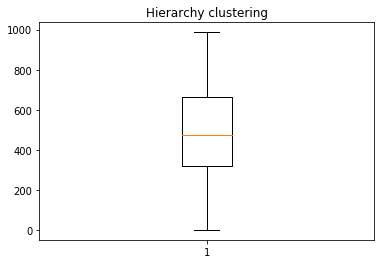

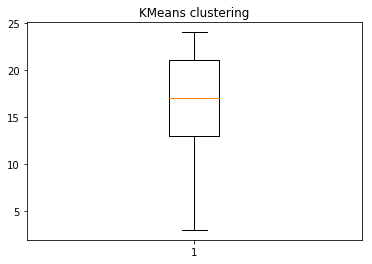

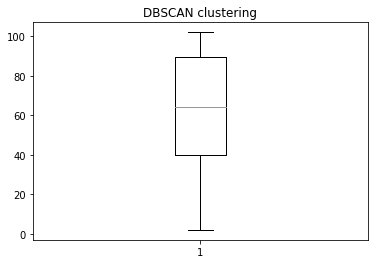

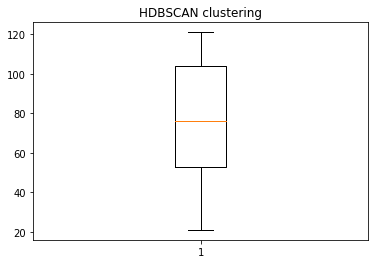

In [10]:
boxCLUSTER(unique_hier,'Hierarchy clustering')
boxCLUSTER(unique_kmeans,'KMeans clustering')
boxCLUSTER(unique_dbscan,'DBSCAN clustering')
boxCLUSTER(unique_hdbscan,'HDBSCAN clustering')

## Pre-process the data
* result_hier      9100 x 7
* result_kmeans    7128 x 7
* result_dbscan    796  x 7
* result_hdbscan   3528  x 7



## Plot each kind of clustering result separately

* Each line corresponds to one column
* Show the fluctuation of each method using different parameters



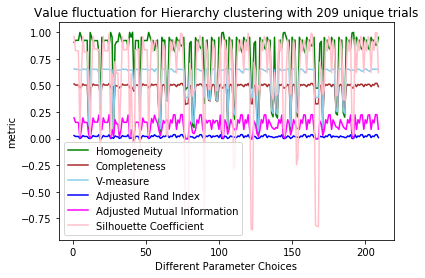

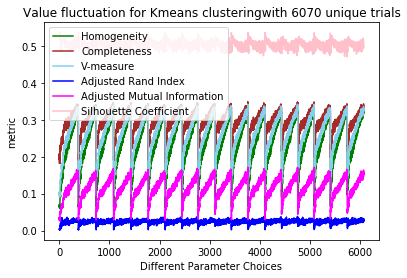

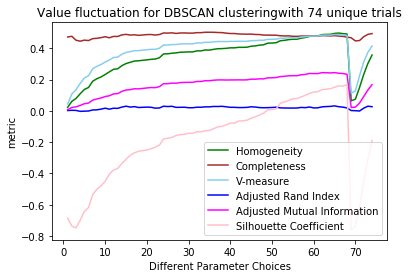

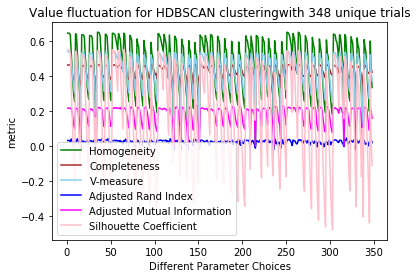

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_col(dflocal,cluster_name,dropF):
    #result_hier_self=result_hier.copy()
    if dropF:
        df = dflocal.iloc[:,:-1].drop_duplicates()
    else:
        df = dflocal.copy()
    df = df[df['Silhouette Coefficient']!='below'].copy()
    df = df[df['Silhouette Coefficient']!='above'].copy()
    col_Homogeneity = df['Homogeneity']
    col_Completeness = df['Completeness']
    col_Vmeasure= df['V-measure']
    col_ARI = df['Adjusted Rand Index']
    col_AMI = df['Adjusted Mutual Information']
    col_SC = df['Silhouette Coefficient']
    
    x_axix=range(1,df.shape[0]+1)

    plt.title('Value fluctuation for '+str(cluster_name)+'with '+str(df.shape[0])+' unique trials')
    plt.plot(x_axix, col_Homogeneity.tolist(), color='green', label='Homogeneity')
    plt.plot(x_axix, col_Completeness.tolist(), color='brown', label='Completeness')
    plt.plot(x_axix, col_Vmeasure.tolist(),  color='skyblue', label='V-measure')
    plt.plot(x_axix, col_ARI.tolist(), color='blue', label='Adjusted Rand Index')
    plt.plot(x_axix, col_AMI.tolist(), color='magenta', label='Adjusted Mutual Information')
    plt.plot(x_axix, col_SC.tolist(), color='pink', label='Silhouette Coefficient')
    plt.legend() # 显示图例
    #a=['','H', 'C', 'V', 'ARI', 'AMI', 'SC']
    #plt.xticks(arange(len(a)),a)
    plt.xlabel('Different Parameter Choices')
    plt.ylabel('metric')
    plt.show()
    

plot_col(result_hier.copy(),'Hierarchy clustering ',1)

plot_col(result_kmeans.copy(),'Kmeans clustering',1)

plot_col(result_dbscan.copy(),'DBSCAN clustering',1)

plot_col(result_hdbscan.copy(),'HDBSCAN clustering',1)

# To compare all the results for different metirc
### Detail
* metric can be 'Homogeneity','Completeness','V-measure','Adjusted Rand Index','Adjusted Mutual Information','Silhouette Coefficient'
* Delete clustering result leading to cluster less than 2 or # of cluster = # of swc files

### The unique_* below is a dataframe containing the unique rows of the original trails, it also record number of cluster under that parameter

#### add SNN

In [12]:
result_snn= pd.DataFrame(columns =['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index',
       'Adjusted Mutual Information', 'Silhouette Coefficient', 'parameter',
       'Cluster Num'],index=['snn0'])
_ = ns. get_clusters(method='SNN_community',
                     karg_dict={'knn':5,
                                'metric':'minkowski',
                                'method':'FastGreedy'})
h = metrics.homogeneity_score(ns.metadata['CellType'],ns.metadata['Cluster'])
c = metrics.completeness_score(ns.metadata['CellType'],ns.metadata['Cluster'])
V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
if len(typeR)<2:
    SS = 'below'
elif len(typeR)>=ns.UMAP.shape[0]:
    SS = 'above'
else:
    SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
result_snn.loc['snn0','Homogeneity']= h
result_snn.loc['snn0','Completeness']= c
result_snn.loc['snn0','V-measure']=V
result_snn.loc['snn0','Adjusted Rand Index']=ARI
result_snn.loc['snn0','Adjusted Mutual Information']=AMI
result_snn.loc['snn0','Silhouette Coefficient']=SS
result_snn.loc['snn0','parameter']=str({'knn':5,
                                'metric':'minkowski',
                                'method':'FastGreedy'})
result_snn.loc['snn0','Cluster Num']=len(typeR)
unique_snn = result_snn.copy()

Result of SNN_community


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



#  Look into the top ten rows which maximizing ARI
### function maxARI(uniqueDF,cluster_method,swcDF,metric,flipF,size_Z)
* **uniqueDF** is the dataframe with unrepeated parameters
* **cluster_method** can be 'Hierarchy','Kmeans', 'DBSCAN','HDBSCAN','' 
* **swcDF** is the dataframe containing the coordinate of the soma
* **metric** can be 'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'

* **flipF**: 
    * if 1, will flip all the soma to the same hemishphere
* **size_Z** the size of z axis of the brain
* **clusterT** the minimum and maximum threshold for number of cluster
* **somaDF** is the dataframe containing the region of soma: ns.features['soma_features'].region
* **axonDF** is the dataframe containing the region of axon: ns.features['projection_features'].raw_data
* **normaF** is the indicator for whether normalize the result or not.
* **row_value** is the number of rows to take into comparison.
* **Ffromto** is the indicator for whether return the from-to dataframe for chord diagram.

In [13]:
def normalize(df, log=True):
    scaled_data = np.array(df) / np.sum(df, axis=0).values.reshape(-1,1) * 100000
    if log:
        scaled_data = np.log(scaled_data+100)
    scaled_dataDF = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
    return scaled_dataDF

In [14]:
import ast
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib as mpl
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
def maxARIdic(uniqueDF,cluster_method,swcDF,flipF,size_Z,clusterT,somaDF,axonDF,normaF,row_value,Ffromto):
    [min_Clusternum,max_Clusternum]=clusterT
    somaregionDF = somaDF.copy()
    axonregionDF = axonDF.copy()            
    df_pre = uniqueDF.copy()
    df_pre = df_pre[df_pre['Silhouette Coefficient']!='below'].copy()
    df_pre = df_pre[df_pre['Silhouette Coefficient']!='above'].copy()
    df_pre = df_pre[df_pre['Completeness']!=1].copy()
    row_value=10
    df_pre.sort_values('Adjusted Rand Index',inplace=True,ascending=False)
    delist = df_pre.index[min(row_value,uniqueDF.shape[0]):]
    df_pre.drop(delist,inplace =True)
    df_pre = df_pre[df_pre['Cluster Num']<=max_Clusternum].copy()
    df_pre = df_pre[df_pre['Cluster Num']>=min_Clusternum].copy()

    #under each parameter
    iter_idx = df_pre.index[0]
    _ = ns. get_clusters(method = cluster_method,karg_dict = ast.literal_eval(df_pre.loc[iter_idx]['parameter']))
    somaregionDF['cluster'] = ns.metadata['Cluster']
    axonregionDF['cluster'] = ns.metadata['Cluster']
    V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
    ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
    AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
    typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
    if cluster_method == 'HDBSCAN':
        delist=np.array([])
        for itertype in typeR:
            if itertype[1]=='-':
                delist = np.append(delist,itertype)
            if itertype[1]=='0':
                delist=np.append(delist,itertype)
        detailDF = pd.DataFrame(index = np.setdiff1d(typeR,delist),columns = ['swc list','soma region',
                                                                              'max soma','total soma',
                                                                              'max axon'])
    else:
        detailDF = pd.DataFrame(index = typeR,columns = ['swc list','soma region','max soma','total soma',
                                                         'max axon'])
    #
    #detailDF.loc[:,'Cluster Type'] = detailDF.index
    if len(typeR)<2:
        SS = 'below'
    elif len(typeR)>=ns.UMAP.shape[0]:
        SS = 'above'
    else:
        SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
        #LABEL LIST CAN BE DETELETED LATER


    # for each cluster result UNDER EACH PARAMETER
    somaCLUSTERlist = []
    axonCLUSTERlist = []

    #axonCLUSTER = pd.DataFrame(index = axonregionDF.columns[:-1])
    for label_idx in detailDF.index:
        axonTEMPdf = pd.DataFrame(index = axonregionDF.columns[:-1])
        swcINlabel = somaregionDF[somaregionDF['cluster']==label_idx]
        detailDF.loc[label_idx,'swc list'] = (swcINlabel.index).tolist()
        #assert(len(inter_list)==somaDF[somaDF['cluster'] !=label_idx].shape[0])
        detailDF.loc[label_idx,'soma region'] = swcINlabel['Region'].tolist()
        del_soma_region=detailDF.loc[label_idx,'soma region']
        while 'unknown' in del_soma_region:
            del_soma_region.remove('unknown')
            del_soma_region.append('others')
        while 'fiber tracts' in del_soma_region:
            del_soma_region.remove('fiber tracts')
            del_soma_region.append('others')
        IDrange, IDcounts = np.unique(del_soma_region, return_counts = True)
        #sort the counting
        count_sort_ind = np.argsort(-IDcounts)
        dicitem = []
        for i in range(1,min(len(IDrange)+1,4)):
            dicitem.append(str(i)+'somaR')
        for i in range(1,min(len(IDrange)+1,4)):
            dicitem.append(str(i)+'somaC')
        #select the first three regions
        dicvalue = IDrange[count_sort_ind][0:min(3,len(IDrange))]
        dicvalue = np.append(dicvalue,IDcounts[count_sort_ind][0:min(3,len(IDrange))])
        detailDF.loc[label_idx,'max soma'] = str(dict(zip(dicitem, dicvalue)))
        somaCLUSTERlist.append(detailDF.loc[label_idx,'max soma'] )
        detailDF.loc[label_idx,'total soma'] = swcINlabel.shape[0]

        #axonLABEL stores all the rows under same cluster
        axonLABEL = axonregionDF[axonregionDF['cluster']==label_idx].copy()
        axonLABEL.drop('cluster', axis=1,inplace=True)
        axonTEMPdf[label_idx]=axonLABEL.sum()
        if 'contra_fiber tracts' in axonTEMPdf.index:
            axonTEMPdf.drop(index=['contra_fiber tracts'],inplace = True)
        if 'ipsi_fiber tracts' in axonTEMPdf.index:
            axonTEMPdf.drop(index=['ipsi_fiber tracts'],inplace = True)
        if normaF:
            #normalize the sum
            axonTEMPdf = normalize(axonTEMPdf , log=True)
        axonTEMPdf.sort_values(by=label_idx, ascending=False, inplace=True)
        dicitem = []
        for i in range(1,4):
            dicitem.append(str(i)+'axonR')
        for i in range(1,4):
            dicitem.append(str(i)+'axonC')
        dicvalue = axonTEMPdf.index[:3]
        dicvalue = np.append(dicvalue,axonTEMPdf.loc[:,label_idx][:3])
        detailDF.loc[label_idx,'max axon'] = str(dict(zip(dicitem, dicvalue)))
        axonCLUSTERlist.append(detailDF.loc[label_idx,'max axon'] )
    if not Ffromto:
        return detailDF
    else:
        clusterDF=detailDF.copy()
        dfname=[]
        for cluster_idx in clusterDF.index:
            dfname.append((str(cluster_idx) + 'DF'))

        #generate a dataframe for each cluster
        dicDF = {k:None for k in dfname}

        #iterate the correponding dataframe and cluster at the same time
        for key_iter,cluster_idx in zip(dicDF.keys(),clusterDF.index):
            dic_soma = ast.literal_eval(clusterDF.loc[cluster_idx,'max soma'])
            iterL = int(len(dic_soma.keys())/2)
            somaNAME = []
            somaCOUNT = []

            for i in range(1,int(iterL)+1):
                somaNAME.append(dic_soma[(str(i)+'somaR')])
            for i in range(1,iterL+1):
                somaCOUNT.append(dic_soma[str(i)+'somaC'])
            somaArr = np.array(somaCOUNT, dtype = float)
            somaArr = somaArr/sum(somaArr)
            dic_axon = ast.literal_eval(clusterDF.loc[cluster_idx,'max axon'])
            iterL = int(len(dic_axon.keys())/2)
            axonNAME = []
            axonCOUNT = []
            for i in range(1,iterL+1):
                axonNAME.append(dic_axon[(str(i)+'axonR')])
            for i in range(1,iterL+1):
                axonCOUNT.append(dic_axon[str(i)+'axonC']) 

            tempDF = pd.DataFrame()
            for row_soma in somaNAME:
                for col_axon,len_axon in zip(axonNAME,axonCOUNT):
                    tempDF.loc[row_soma, col_axon] = len_axon

            assert(tempDF.shape[0] == len(somaArr))  
            tempDF=tempDF.astype(float)
            for i in range(tempDF.shape[0]):
                tempDF.iloc[i,:] = tempDF.iloc[i,:]*somaArr[i].copy()

            newDF = pd.DataFrame(columns=['from','to','value'],index=range(tempDF.shape[0]*tempDF.shape[1]))
            newDF.loc[:,'from'] = (tempDF.index).tolist()*len(tempDF.columns)
            newDF.loc[:,'to'] = [ele for ele in (tempDF.columns).tolist() for _ in range(len(tempDF.index))]
            valuelist=[]
            for iter_col in tempDF.columns:
                for iter_row in tempDF.index:
                    valuelist.append(tempDF.loc[iter_row,iter_col])
            newDF.loc[:,'value']=valuelist
            dicDF[key_iter]= newDF.copy()
    return dicDF
     

### The following obtained the first 10 rows which maximizing ARI

#### Only count the nearst 400 inter-cluster soma

In [16]:

#hier_as = maxARIdic(unique_hier,'Hierarchy',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    #ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,10,0)
#hier_as.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/hier_as.xlsx')
hier_as=pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/hier_as.xlsx', index_col=0)
dicHIER= maxARIdic(unique_hier,'Hierarchy',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,10,1)
for iter_key in dicHIER.keys():
    tempDF = dicHIER[iter_key]
    print(tempDF)
    #(tempDF).to_csv('/home/penglab/FeaCal/dataSource/somaLoc/HIER/'+str(iter_key)+'.csv')

Result of Hierarchy CLustering


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



  from           to      value
0  PRE    ipsi_ENTm  11.031743
1  PRE  contra_ENTm   9.672118
2  PRE    ipsi_ENTl   8.686070
  from          to      value
0  MOs  contra_MOs  10.627404
1  MOs  contra_MOp  10.279537
2  MOs    ipsi_MOs   9.671894
     from           to     value
0  others   contra_MOs  7.063669
1    ACAd   contra_MOs  3.531835
2  others  contra_ACAd  6.136240
3    ACAd  contra_ACAd  3.068120
4  others   contra_MOp  5.958836
5    ACAd   contra_MOp  2.979418
  from        to     value
0  VAL  ipsi_MOs  8.123339
1   VM  ipsi_MOs  2.707780
2  VAL  ipsi_MOp  7.552984
3   VM  ipsi_MOp  2.517661
4  VAL   ipsi_CP  6.443909
5   VM   ipsi_CP  2.147970
     from           to     value
0     VAL     ipsi_MOp  4.257211
1     VPL     ipsi_MOp  4.257211
2  others     ipsi_MOp  2.128605
3     VAL  ipsi_SSp-ll  3.886276
4     VPL  ipsi_SSp-ll  3.886276
5  others  ipsi_SSp-ll  1.943138
6     VAL      ipsi_VM  3.622504
7     VPL      ipsi_VM  3.622504
8  others      ipsi_VM  1.811252
     f

  from          to      value
0  MOs    ipsi_MOs  10.194657
1  MOs  contra_MOs   9.556059
2  MOs     ipsi_CP   9.505001
  from         to     value
0   PL  contra_PL  4.833168
1  MOp  contra_PL  2.416584
2  MOs  contra_PL  2.416584
3   PL  contra_CP  4.822130
4  MOp  contra_CP  2.411065
5  MOs  contra_CP  2.411065
6   PL   ipsi_MOp  4.693623
7  MOp   ipsi_MOp  2.346812
8  MOs   ipsi_MOp  2.346812
  from           to     value
0  SUB    contra_AV  9.955515
1  SUB  contra_ENTm  9.947248
2  SUB      ipsi_LD  9.660951
  from          to     value
0  MOs   contra_VM  4.457968
1   PL   contra_VM  4.457968
2  MOs  contra_MRN  4.380140
3   PL  contra_MRN  4.380140
4  MOs   contra_MD  4.279110
5   PL   contra_MD  4.279110
     from           to     value
0    VISp  contra_VISp  6.961621
1  others  contra_VISp  3.480811
2    VISp    contra_CP  5.947837
3  others    contra_CP  2.973919
4    VISp   contra_LGd  5.783523
5  others   contra_LGd  2.891761
     from          to     value
0      ZI  ips

In [17]:
#kmeans_as = maxARIdic(unique_kmeans,'Kmeans',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                 #   ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,10,0)
#kmeans_as.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/kmeans_as.xlsx')
kmeans_as=pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/kmeans_as.xlsx', index_col=0)
dicKMEANS= maxARIdic(unique_kmeans,'Kmeans',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,10,1)
for iter_key in dicKMEANS.keys():
    tempDF = dicKMEANS[iter_key]
    print(tempDF)
    #(tempDF).to_csv('/home/penglab/FeaCal/dataSource/somaLoc/KMEANS/'+str(iter_key)+'.csv')

/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans
   from          to     value
0   MOs   contra_CP  4.379489
1   MOp   contra_CP  2.189745
2  POST   contra_CP  2.189745
3   MOs  contra_MOs  4.347060
4   MOp  contra_MOs  2.173530
5  POST  contra_MOs  2.173530
6   MOs  contra_MOp  4.198688
7   MOp  contra_MOp  2.099344
8  POST  contra_MOp  2.099344
   from         to     value
0   MOs  contra_CP  7.191107
1  ACAd  contra_CP  1.487815
2   PRE  contra_CP  1.239846
3   MOs    ipsi_CP  6.835354
4  ACAd    ipsi_CP  1.414211
5   PRE    ipsi_CP  1.178509
6   MOs   ipsi_MOs  6.517893
7  ACAd   ipsi_MOs  1.348530
8   PRE   ipsi_MOs  1.123775
  from          to     value
0  MOs  contra_MOs  4.312421
1  SUB  contra_MOs  2.874947
2   DG  contra_MOs  2.156210
3  MOs   contra_CP  4.269345
4  SUB   contra_CP  2.846230
5   DG   contra_CP  2.134673
6  MOs    ipsi_MOs  4.177989
7  SUB    ipsi_MOs  2.785326
8   DG    ipsi_MOs  2.088995
  from         to     value
0  MOs   ipsi_MOs  5.013846
1  PRE   ipsi_MOs  2.148791
2   MM   ipsi_MOs  

In [19]:
#dbscan_as = maxARIdic(unique_dbscan,'DBSCAN',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                   # ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,10,0)
#dbscan_as.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/dbscan_as.xlsx')
dbscan_as=pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/dbscan_as.xlsx', index_col=0)
dicDBSCAN= maxARIdic(unique_dbscan,'DBSCAN',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,10,1)
for iter_key in dicDBSCAN.keys():
    tempDF = dicDBSCAN[iter_key]
    print(tempDF)
    #(tempDF).to_csv('/home/penglab/FeaCal/dataSource/somaLoc/DBSCAN/'+str(iter_key)+'.csv')

/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of DBSCAN
     from          to     value
0     MOs  contra_MOs  5.651938
1  others  contra_MOs  1.964149
2     SUB  contra_MOs  1.523217
3     MOs   contra_CP  5.639756
4  others   contra_CP  1.959915
5     SUB   contra_CP  1.519934
6     MOs    ipsi_MOs  5.566601
7  others    ipsi_MOs  1.934492
8     SUB    ipsi_MOs  1.500219
  from           to      value
0  MOp     ipsi_MOp  10.551154
1  MOp  ipsi_SSp-ul   9.085436
2  MOp   contra_MOp   8.661433
  from          to      value
0  MOs   contra_CP  10.359028
1  MOs  contra_MOs  10.144812
2  MOs    ipsi_MOs   9.000610
     from           to     value
0  others   contra_MOp  4.856323
1    ACAv   contra_MOp  3.237549
2    ACAd   contra_MOp  1.618774
3  others   contra_MOs  4.740310
4    ACAv   contra_MOs  3.160207
5    ACAd   contra_MOs  1.580103
6  others  contra_ACAd  4.668653
7    ACAv  contra_ACAd  3.112435
8    ACAd  contra_ACAd  1.556218
  from          to     value
0  MOs  contra_MOp  9.525311
1  MOs    ipsi_MOp  9.340581
2 

In [22]:
#hdbscan_as = maxARIdic(unique_dbscan,'HDBSCAN',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],
                    #ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,10,0)
#hdbscan_as.to_excel('/home/penglab/FeaCal/dataSource/somaLoc/dbscan_as.xlsx')
hdbscan_as=pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/dbscan_as.xlsx', index_col=0)
dicHDBSCAN= maxARIdic(unique_hdbscan,'HDBSCAN',ns.features['soma_features'].raw_data.copy(),1,11400.0,[8,40],ns.features['soma_features'].region,ns.features['projection_features'].raw_data,1,10,1)
for iter_key in dicHDBSCAN.keys():
    tempDF = dicHDBSCAN[iter_key]
    print(tempDF)
    #(tempDF).to_csv('/home/penglab/FeaCal/dataSource/somaLoc/HDBSCAN/'+str(iter_key)+'.csv')

/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN
  from          to     value
0  PeF    ipsi_PAG  4.157608
1  LHA    ipsi_PAG  3.118206
2  PRE    ipsi_PAG  2.078804
3  PeF    ipsi_LHA  3.927104
4  LHA    ipsi_LHA  2.945328
5  PRE    ipsi_LHA  1.963552
6  PeF  contra_PAG  3.827453
7  LHA  contra_PAG  2.870590
8  PRE  contra_PAG  1.913727
     from        to     value
0  others   ipsi_CP  5.449914
1     PCN   ipsi_CP  2.724957
2      MD   ipsi_CP  1.816638
3  others  ipsi_MOs  5.304550
4     PCN  ipsi_MOs  2.652275
5      MD  ipsi_MOs  1.768183
6  others  ipsi_MOp  5.161842
7     PCN  ipsi_MOp  2.580921
8      MD  ipsi_MOp  1.720614
     from          to     value
0     MOs   contra_CP  6.499087
1  others   contra_CP  1.547402
2     PRE   contra_CP  1.272308
3     MOs  contra_MOs  6.368723
4  others  contra_MOs  1.516363
5     PRE  contra_MOs  1.246787
6     MOs    ipsi_MOs  6.271021
7  others    ipsi_MOs  1.493100
8     PRE    ipsi_MOs  1.227660


## Cocluster matrix

In [29]:
import numpy as np
numBins = 10  # number of bins in each dimension
data = np.random.randn(100000, 3)  # generate 100000 3-d random data points
data

array([[ 2.21243779, -1.68398986,  0.4726078 ],
       [ 1.55153072, -0.02389396, -0.73727068],
       [-0.14828804,  1.32273723,  0.19696022],
       ...,
       [-0.60210688, -1.17804752,  1.48638691],
       [-0.73463626, -0.60605058,  0.23873266],
       [-1.98843262, -0.5707021 , -0.82072646]])

In [30]:
jointProbs, edges = np.histogramdd(data, bins=numBins)
jointProbs /= jointProbs.sum()

In [42]:
ns.UMAP

,0,1
AA0001,-6.244337,-11.908632
AA0002,-10.665743,2.217522
AA0003,-10.661317,2.196839
AA0004,9.799737,-2.201111
AA0005,-10.344245,2.576714
AA0006,-6.215451,13.877687
AA0007,9.816735,-2.200614
AA0008,-6.254221,-11.902263
AA0009,-13.740979,3.288190
AA0010,2.552635,1.150235


In [41]:
ns.metadata.index

Index(['AA0001', 'AA0002', 'AA0003', 'AA0004', 'AA0005', 'AA0006', 'AA0007',
       'AA0008', 'AA0009', 'AA0010',
       ...
       'AA0993', 'AA0994', 'AA0995', 'AA0996', 'AA0997', 'AA0998', 'AA0999',
       'AA1000', 'AA1001', 'AA1002'],
      dtype='object', length=987)

/home/penglab/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning:

Embedding a total of 218 separate connected components using meta-embedding (experimental)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB o

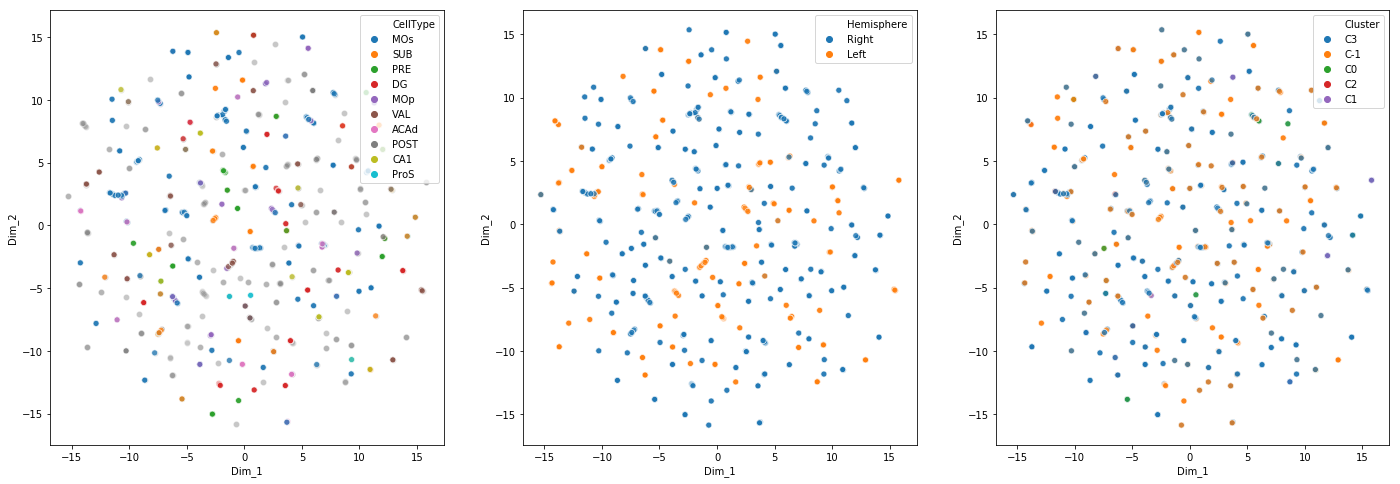

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,inconsistent
l_ori = ns.metadata['Cluster']
l_test = []
for i in l_ori:
    l_test.append(i[1:])
Z_sample = linkage(l_test , 'ward')
    
thres = 10
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
d = dendrogram(Z_sample, labels=co_cluster.index, leaf_rotation=90, leaf_font_size=10,orientation="top", color_threshold=None,)

ValueError: Length n of condensed distance matrix 'y' must be a binomial coefficient, i.e.there must be a k such that (k \choose 2)=n)!

In [ ]:
def plot_co_cluster(co_cluster, save_prefix=None):
    # Plot 1: Hierarchical clustering (by samples)

    Z_sample = linkage(co_cluster, 'ward')
    #     Z_sample = linkage(scipy.spatial.distance.squareform(1-co_cluster), 'ward')

    thres = 10
    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    d = dendrogram(Z_sample, labels=co_cluster.index, leaf_rotation=90, leaf_font_size=10,
                   orientation="top", color_threshold=None,
                   )
    # plt.axhline(y=thres, c='grey', lw=1, linestyle='dashed')
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance (Ward)')

    # transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
    #     my_color=celltype.loc[d['ivl'], 'Sub_type'].cat.codes
    my_color = [celltypes_col[CLA.meta_data.loc[i, "Subtype"]] for i in d['ivl']]

    # Apply the right color to each label
    ax = plt.gca()
    xlbls = ax.get_xmajorticklabels()
    num = -1
    for lbl in xlbls:
        num += 1
        lbl.set_color(my_color[num])
    # if not save_prefix is None:
    #     fig.savefig("../Figure/Dendrogram_AllNeurons_Resample.pdf")

    # Plot 2: Heatmap
    col_colors = pd.DataFrame({'Type': [celltypes_col[i] for i in CLA.meta_data["Subtype"]]},
                              index=CLA.meta_data.index)
    col_colors = col_colors.loc[co_cluster.index]
    g = sns.clustermap(co_cluster, linecolor='white',
                       row_colors=col_colors, col_colors=col_colors,
                       row_linkage=Z_sample, col_linkage=Z_sample,
                       annot=False, figsize=(12, 12))
    # if save:
    #     g.savefig("../Figure/Heatmap_CoCluster_AllNeurons.pdf")
    return